In [1]:
import os
import os.path
from natsort import natsorted
from xml.etree.ElementTree import parse

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
%matplotlib inline

In [2]:
DATA_FOLDER = "./data/"
label_to_color = {"with_mask": "g", "mask_weared_incorrect": "y", "without_mask": "r"}
image_folder = os.path.join(DATA_FOLDER, "images")
annot_folder = os.path.join(DATA_FOLDER, "annotations")
image_paths = natsorted([os.path.join(image_folder, image_name) 
                      for image_name in os.listdir(image_folder)])
annot_paths = natsorted([os.path.join(annot_folder, annot_name)
                      for annot_name in os.listdir(annot_folder)])

print(f"example of image file path: {image_paths[0]}")
print(f"example of annotation file path: {annot_paths[0]}")

example of image file path: ./data/images/maksssksksss0.png
example of annotation file path: ./data/annotations/maksssksksss0.xml


In [3]:
def process_xml_annotation(xml_file_name):
    """Extract information from annotation xml file of the photo.
    
    Keyword arguments:
    xml_file_name -- path to the xml file
    """    
    doc = parse(xml_file_name)
    
    # Get meta parameters from annotation
    folder_arg = doc.findtext("folder")
    filename_arg = doc.findtext("filename")
    segmented_arg = doc.findtext("segmented")
    
    # Get size dimensions of the picture
    size_obj = doc.find("size")
    width_arg = int(size_obj.findtext("width"))
    height_arg = int(size_obj.findtext("height"))
    depth_arg = int(size_obj.findtext("depth"))
    
    # Iterate through all objects
    objects = []
    for obj in doc.findall("object"):
        name_arg = obj.findtext("name")
        pose_arg = obj.findtext("pose")
        occluded_arg = obj.findtext("occluded")        
        truncated_arg = obj.findtext("truncated")
        difficult_arg = obj.findtext("difficult")
        
        # Get the coordinates of the box
        bndbox_obj = obj.find("bndbox")
        xmin_arg = int(bndbox_obj.findtext("xmin"))
        xmax_arg = int(bndbox_obj.findtext("xmax"))
        ymin_arg = int(bndbox_obj.findtext("ymin"))
        ymax_arg = int(bndbox_obj.findtext("ymax"))
        
        objects.append((name_arg, pose_arg, occluded_arg, truncated_arg, difficult_arg,
                        (xmin_arg, ymin_arg), (xmax_arg, ymax_arg)))
    return (folder_arg, filename_arg, segmented_arg,
            (width_arg, height_arg, depth_arg), objects)


def show_image(image_path, annot_path):
    """Plot image that is located at image_path
    
    Keyword arguments:
    image_path -- path to the image
    """
    fig, ax = plt.subplots(1)  # create figure and axes

    img = mpimg.imread(image_path)  # extract image using path
    ax.imshow(img)  # display image
    
    # Get box coordinates from xml annotation
    _, _, _, dims, boxes = process_xml_annotation(annot_path)
    for box in boxes:  # add boxes for faces and masks
        label = box[0]
        xmin, ymin = box[5]
        xmax, ymax = box[6]
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2,
                                 edgecolor=label_to_color[label], facecolor="none")
        ax.add_patch(rect)  # add box to the image
    
    plt.show()  # show final result

./data/images/maksssksksss0.png:


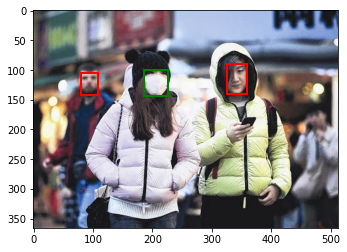

./data/images/maksssksksss1.png:


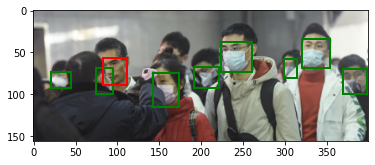

./data/images/maksssksksss2.png:


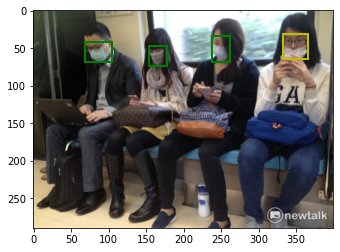

In [4]:
# Show 3 examples of the images in dataset
for i in range(3):
    print(f"{image_paths[i]}:")
    show_image(image_paths[i], annot_paths[i])

---

In [5]:
folder_ls, segmented_ls, width_ls, height_ls, depth_ls, name_ls, pose_ls, occluded_ls,\
    truncated_ls, difficult_ls = [], [], [], [], [], [], [], [], [], []

for annot_path in annot_paths:
    folder_arg, filename_arg, segmented_arg, dims, objects = process_xml_annotation(annot_path)

    folder_ls.append(folder_arg)
    segmented_ls.append(segmented_arg)
    width_ls.append(dims[0])
    height_ls.append(dims[1])
    depth_ls.append(dims[2])
    
    for box in objects:
        name_arg, pose_arg, occluded_arg, truncated_arg, difficult_arg, _, _ = box
    
        name_ls.append(name_arg)
        pose_ls.append(pose_arg)
        occluded_ls.append(occluded_arg)
        truncated_ls.append(truncated_arg)
        difficult_ls.append(difficult_arg)

In [28]:
print("'folder' unique values: {}".format(set(folder_ls)))
print("'segmented' unique values: {}".format(set(segmented_ls)))
print("'pose' unique values: {}".format(set(pose_ls)))
print("'occluded' unique values: {}".format(set(occluded_ls)))
print("'truncated' unique values: {}".format(set(truncated_ls)))
print("'difficult' unique values: {}".format(set(difficult_ls)))
print("'depth' unique values: {}".format(set(depth_ls)))
print("'name' unique values: {}".format(set(name_ls)))
print("Number of unique values of 'width' argument: {}".format(len(set(width_ls))))
print("Number of unique values of 'height' argument: {}".format(len(set(height_ls))))

'folder' unique values: {'images'}
'segmented' unique values: {'0'}
'pose' unique values: {'Unspecified'}
'occluded' unique values: {'0'}
'truncated' unique values: {'0'}
'difficult' unique values: {'0'}
'depth' unique values: {3}
'name' unique values: {'mask_weared_incorrect', 'with_mask', 'without_mask'}
Number of unique values of 'width' argument: 39
Number of unique values of 'height' argument: 104


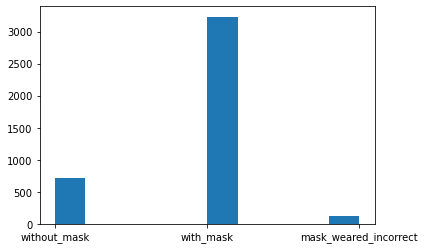

In [22]:
plt.hist(name_ls)
plt.show()